In [2]:
import sys
print(sys.path)

['/Users/hecate/研一/单细胞学习', '/opt/anaconda3/lib/python38.zip', '/opt/anaconda3/lib/python3.8', '/opt/anaconda3/lib/python3.8/lib-dynload', '', '/opt/anaconda3/lib/python3.8/site-packages', '/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/opt/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/hecate/.ipython']


In [3]:
pip install scrublet

Note: you may need to restart the kernel to use updated packages.


In [4]:
###魔法函数
%matplotlib inline 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

NameError: name 'plt' is not defined

In [5]:
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [6]:
input_dir = '/Users/hecate/研一/单细胞学习/2021.09.14/pbmc3k_filtered_gene_bc_matrices/filtered_gene_bc_matrices/hg19'

In [7]:
counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
genes = np.array(scr.load_genes(input_dir + '/genes.tsv', delimiter='\t', column=1))
out_df = pd.read_csv(input_dir + '/barcodes.tsv', header = None, index_col=None, names=['barcode'])

In [8]:
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 2700 rows, 32738 columns
Number of genes in gene list: 32738


## 初始化Scrublet对象

In [9]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)

## 计算doublet score

In [10]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, min_cells=3, min_gene_variability_pctl=85, n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 41.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%
Elapsed time: 2.0 seconds


## 绘制doublet score分布直方图

In [20]:
scrub.call_doublets(threshold=0.30)
# 如果自动阈值检测效果不佳，则可以使用call_doublets()函数调整阈值

Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 41.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%


array([False, False, False, ..., False, False, False])

### Doublet score分布直方图包括观察到的转录组和模拟的doublet，模拟的doublet直方图通常是双峰的。

(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

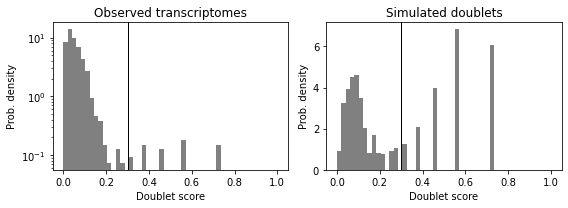

In [21]:
# 画doublet score直方图
scrub.plot_histogram()
### 理想情况下，阈值应在模拟doublet直方图的两种模式之间设置最小值

## 降维可视化

In [22]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done.')

Running UMAP...
Done.


(<Figure size 576x288 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Predicted doublets'}, xlabel='UMAP 1', ylabel='UMAP 2'>,
        <AxesSubplot:title={'center':'Doublet score'}, xlabel='UMAP 1', ylabel='UMAP 2'>],
       dtype=object))

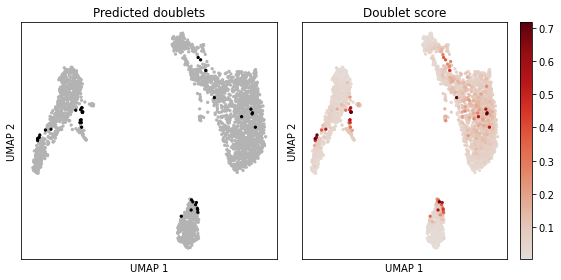

In [23]:
###UMAP可视化
scrub.plot_embedding('UMAP', order_points=True)

In [24]:
# doublets占比
print (scrub.detected_doublet_rate_)
# 0.043789523923159525

0.014074074074074074


### 把doublets预测结果保存到文件，后续用Seurat等软件处理的时候可以导入doublets的预测结果对barcode进行筛选。

In [26]:
out_df['doublet_scores'] = doublet_scores
out_df['predicted_doublets'] = predicted_doublets
out_df.to_csv(input_dir + '/doublet.txt', index=False,header=True)
out_df.head()

,barcode,doublet_scores,predicted_doublets
0,AAACATACAACCAC-1,0.087379,False
1,AAACATTGAGCTAC-1,0.077609,False
2,AAACATTGATCAGC-1,0.050505,False
3,AAACCGTGCTTCCG-1,0.062164,False
4,AAACCGTGTATGCG-1,0.019791,False
